In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "netflix_titles.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)


In [2]:
# Display basic info
display(df.head())
display(df.info())
display(df.describe())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


None

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


In [4]:
# Fill missing values (for simplicity, dropping them for now)
df.dropna(inplace=True)

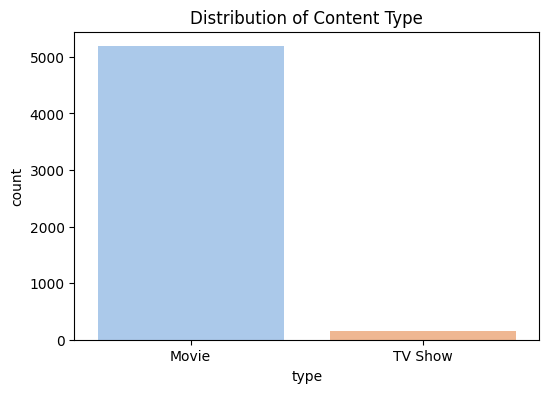

In [14]:
# Countplot for type of content
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, hue='type', palette='pastel', legend=False)
plt.title("Distribution of Content Type")
plt.show()

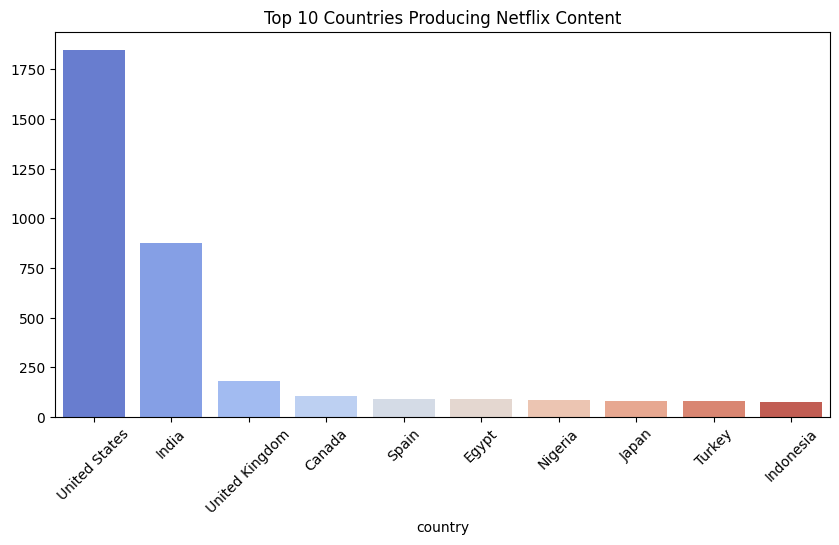

In [18]:
# Top 10 countries producing Netflix content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, dodge=False, palette='coolwarm', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()

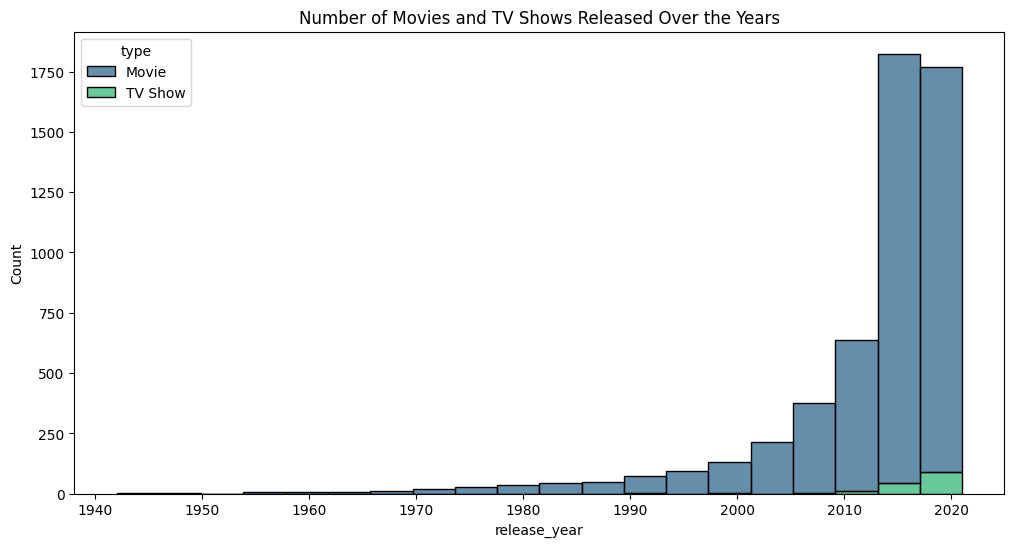

In [19]:
# Movies vs TV Shows over the years
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='release_year', hue='type', multiple='stack', bins=20, palette='viridis')
plt.title("Number of Movies and TV Shows Released Over the Years")
plt.show()

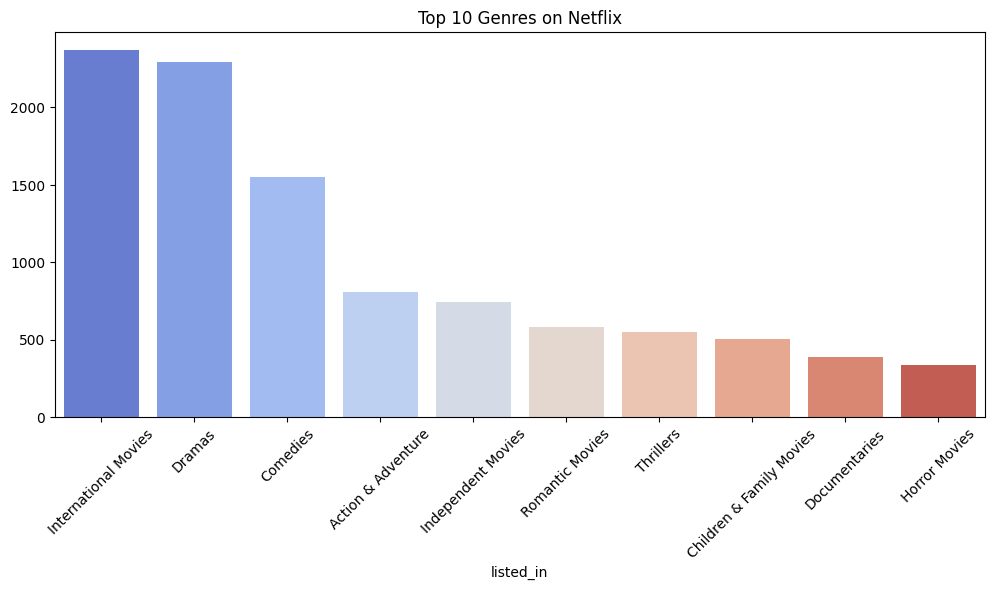

In [20]:
# Top 10 most popular genres
genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=genres.index, y=genres.values, hue=genres.index, dodge=False, palette='coolwarm', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Genres on Netflix")
plt.show()